<a href="https://colab.research.google.com/github/jamesbrowne98/jamesbrowne98/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)
print(np.shape(inputs))

#Normalize the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_targets = scaler.fit_transform(targets)

print(scaled_inputs)
print(scaled_targets)



(768, 8)
[[1.         0.         0.28571429 ... 0.         0.         0.        ]
 [1.         0.         0.28571429 ... 0.33333333 0.         0.        ]
 [1.         0.         0.28571429 ... 0.66666667 0.         0.        ]
 ...
 [0.         1.         0.71428571 ... 0.33333333 1.         1.        ]
 [0.         1.         0.71428571 ... 0.66666667 1.         1.        ]
 [0.         1.         0.71428571 ... 1.         1.         1.        ]]
[[0.25721219 0.28090493]
 [0.25721219 0.28090493]
 [0.25721219 0.28090493]
 ...
 [0.28120787 0.1672502 ]
 [0.28228633 0.153784  ]
 [0.28660016 0.13816321]]


Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(scaled_inputs, scaled_targets)
outputs = regressor.predict(scaled_inputs)
print("Random Forest Regressor: \n", outputs)

Random Forest Regressor: 
 [[0.2634268  0.28869109]
 [0.26277164 0.28343119]
 [0.25999461 0.28296795]
 ...
 [0.28319493 0.16380824]
 [0.28425991 0.15234043]
 [0.28623349 0.14269324]]


Neural Network Regressor

In [5]:
from sklearn.neural_network import MLPRegressor
regressor_NN = MLPRegressor(max_iter=5000)
regressor_NN.fit(scaled_inputs, scaled_targets)
outputs = regressor_NN.predict(scaled_inputs)
print("MLP Regressor: \n", outputs)


MLP Regressor: 
 [[0.45570695 0.42530066]
 [0.43004507 0.43143756]
 [0.40502961 0.43861081]
 ...
 [0.34529151 0.23262214]
 [0.34209378 0.24147208]
 [0.33445473 0.26312872]]


Support Vector Machine Regressor


In [29]:
#first the Y's must be split and normalized
from sklearn.svm import SVR
targetY1 = data["Y1"]
targetY2 = data["Y2"]
x = data.iloc[:,0:8].values
y = data.iloc[:,8:10].values

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [37]:
Y1 = y[:,:1]
Y2 = y[:,1:]

In [39]:
Y1_reg = SVR()
Y1_reg.fit(x, Y1.reshape(-1))
predY1 = Y1_reg.predict(x)
print(predY1)

[0.35504785 0.35751805 0.34678964 0.33296785 0.36429904 0.36669783
 0.35395753 0.33960422 0.32054237 0.32290067 0.30875848 0.29261367
 0.40806651 0.42168256 0.41235271 0.39295674 0.51421049 0.54080088
 0.53698344 0.51302093 0.57002719 0.58332993 0.58614496 0.58343891
 0.10205707 0.06996078 0.06919454 0.10120301 0.09673619 0.0652879
 0.06496452 0.09701465 0.10567137 0.07615456 0.07597874 0.10628157
 0.12352517 0.09616953 0.09584518 0.12362224 0.145869   0.12045472
 0.11968227 0.1446808  0.17011947 0.14612533 0.14474247 0.16721685
 0.51860932 0.54542511 0.53249166 0.49283359 0.52076132 0.54068811
 0.52673489 0.49509454 0.44674132 0.46332163 0.44874585 0.41950487
 0.54991281 0.57570794 0.56642783 0.53670808 0.68085293 0.7196459
 0.71580074 0.68135483 0.7475017  0.76837258 0.76828911 0.75566425
 0.10515089 0.07470143 0.07579474 0.10907555 0.10382775 0.07516456
 0.07774014 0.11146189 0.11858449 0.09336956 0.09705277 0.1289372
 0.14154095 0.12000203 0.12439522 0.15351462 0.16751226 0.1490615

In [38]:
Y2_reg = SVR()
Y2_reg.fit(x, Y2.reshape(-1))
predY2 = Y2_reg.predict(x)
print(predY2)

[0.35243481 0.28914837 0.2945659  0.38102942 0.38910154 0.31049946
 0.32205353 0.43901694 0.3467632  0.26032068 0.27397492 0.40360098
 0.44726569 0.36518082 0.37612079 0.49848046 0.56333468 0.49370233
 0.49925756 0.60065891 0.6044388  0.55454486 0.54528042 0.598642
 0.10017559 0.06281587 0.06424896 0.10748873 0.09715127 0.06221354
 0.06344645 0.10385873 0.10359813 0.07261841 0.07344483 0.10902973
 0.1127574  0.08661358 0.08679392 0.11604187 0.12264682 0.10049145
 0.10000018 0.12370886 0.13172323 0.1124705  0.11135098 0.1306457
 0.46234345 0.40664224 0.40662813 0.4830754  0.4984393  0.41961248
 0.42104791 0.53084234 0.43853391 0.34532983 0.34442468 0.46713391
 0.55247755 0.46314362 0.45901239 0.57456237 0.68813135 0.61468659
 0.60678822 0.70023364 0.70483893 0.65954081 0.64937331 0.70338965
 0.10861127 0.06858355 0.067047   0.10980804 0.11071573 0.073916
 0.07220716 0.11134862 0.12332484 0.09185896 0.09003404 0.12333246
 0.1369857  0.11195024 0.11009725 0.13622585 0.14901653 0.12929489


Part 1.3

In [6]:
from numpy.lib.shape_base import split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.ma.core import reshape
from sklearn.base import ClassifierMixin
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [7]:
x_train, xtest, ytrain, ytest = train_test_split(scaled_inputs, scaled_targets, test_size=0.2)

In [8]:
#SVM needs to be done in two parts as it cannot fit both Y's
#Y1 training 
regressor_svm = SVR()
regressor_svm.fit(x_train, ytrain[:,0])
output_svm = regressor_svm.predict(xtest)
cross_val_score = cross_val_score(regressor_svm, x_train, ytrain[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM = (mean_squared_error(ytest[:,0], output_svm))

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
#Y1 testing
regressor_svm_ts = SVR()
regressor_svm_ts.fit(xtest, ytest[:,0])
output_svm = regressor_svm_ts.predict(xtest)
cross_val_score = cross_val_score(regressor_svm_ts, xtest, ytest[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM_ts = (mean_squared_error(ytest[:,0], output_svm))

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
#Y2 training 
regressor_svm1 = SVR()
regressor_svm1.fit(x_train, ytrain[:,1])
output_svm1 = regressor_svm1.predict(xtest)
cross_val_score = cross_val_score(regressor_svm1, x_train, ytrain[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM1 = mean_squared_error(ytest[:,1], output_svm1)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
#Y2 Testing 
regressor_svm1_ts = SVR()
regressor_svm1_ts.fit(xtest, ytest[:,1])
output_svm1 = regressor_svm1_ts.predict(xtest)
cross_val_score = cross_val_score(regressor_svm1_ts, xtest, ytest[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM1_ts = mean_squared_error(ytest[:,1], output_svm1)

In [15]:
#making predictions for models for random forest and neural network 
#for training
y_pred_regressor_tr = regressor.predict(x_train)
y_pred_regressor_NN_tr = regressor_NN.predict(x_train)

#for testing
y_pred_regressor = regressor.predict(xtest)
y_pred_regressor_NN = regressor_NN.predict(xtest)

In [16]:
#Calculating MSE
from sklearn.metrics import mean_absolute_error

#for training
mse_regressor_tr = mean_absolute_error(ytrain, y_pred_regressor_tr)
mse_regressor_NN_tr = mean_absolute_error(ytrain, y_pred_regressor_NN_tr)

#for testing
mse_regressor = mean_absolute_error(ytest, y_pred_regressor)
mse_regressor_NN = mean_absolute_error(ytest, y_pred_regressor_NN)


In [20]:
print(f"Testing MSE of Random Forest is {mse_regressor}")
print(f"Training MSE of Random Forest is {mse_regressor_tr}")
print()

print(f"Training MSE of Neural Network is {mse_regressor_NN_tr}")
print(f"Testing MSE of Neural Network is {mse_regressor_NN}")
print()

print(f"Training MSE of Support Vector Y1 is {mse_SVM}")
print(f"Testing MSE of Support Vector Y1 is {mse_SVM_ts}")
print()

print(f"Training MSE of Support Vector Y2 is {mse_SVM1}")
print(f"Testing MSE of Support Vector Y2 is {mse_SVM1_ts}")
print()

Testing MSE of Random Forest is 0.0068657617578538116
Training MSE of Random Forest is 0.006853008007414443

Training MSE of Neural Network is 0.058387800140087646
Testing MSE of Neural Network is 0.057467335128594935

Training MSE of Support Vector Y1 is 0.004888237661566062
Testing MSE of Support Vector Y1 is 0.005367386718194461

Training MSE of Support Vector Y2 is 0.006487667849716329
Testing MSE of Support Vector Y2 is 0.005852861671835386



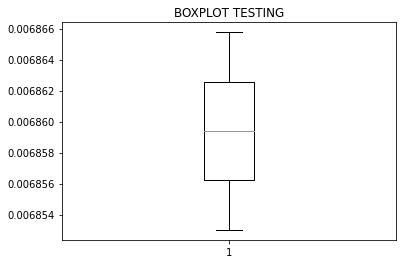

In [18]:
import matplotlib.pyplot as plt
plt.title("BOXPLOT TESTING")
plt.boxplot([mse_regressor, mse_regressor_tr])
plt.show()

Part 2 


In [19]:
list = []
f = open("timetable.txt", 'r')
for line in f: list.append(line.split("|"))
f.close()
print(list)

[['MOD001', 'Zacharias Karstensen', '2', 'MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013 /\n'], ['MOD002', 'Dominykas Cleary', '2', 'MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013 /\n'], ['MOD003', 'Zacharias Karstensen', '2', 'MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013 /\n'], ['MOD004', 'Laila Deniau', '1', 'MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013 /\n'], ['MOD005', 'Brahma O Braonain', '2', 'MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012 /\n'], ['MOD006', 'Brahma O Braonain', '3', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012 /\n'], ['MOD007', 'Ruh Kerekes', '1', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD008,MOD009,MOD010,MOD011,MOD014,MOD015,MOD016,MOD017 /\n'], ['MOD008', 'Brahma O Braonain', '2', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD009,MOD010,MOD011,MOD012,MOD014,MOD015 /